Taller 1.

Herraminetas Computacionales

Camilo Santiago Castillo Lasso

201412050

Se importan las librerias que seran usadas

In [1]:
import os
import pandas as pd
from scipy import stats as st
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Funcion que retorna la serie IDEAM 

Parametros: nombre de la ciudad

retorno: serie_IDEAM

In [2]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
def serie_IDEAM(ciudad):
    serie_csvIDEAM=os.path.join(base_dir,ciudad,'IDEAM'+'.csv')
    serie_IDEAM=pd.read_csv(serie_csvIDEAM, sep=';',encoding='latin-1')
    return serie_IDEAM

Funcion que retorna la serie NREL 

Parametros: nombre de la ciudad

retorno: serie_NREL

In [3]:
def serie_NREL(ciudad):
    serie_csvNREL=os.path.join(base_dir,ciudad,'NREL'+'.csv')
    serie_NREL=pd.read_csv(serie_csvNREL, sep=';',encoding='latin-1')
    return serie_NREL

Funcion que retorna las series IDEAM y NREL.

Parametros: nombre ciudad.

retorna: serie_IDEAM, serie_NREL

In [4]:
def darSeries(ciudad):
    return serie_IDEAM(ciudad), serie_NREL(ciudad)

Funcion que retorna la energia total en $kWh/m^2$ para cada mes de la serie horaria.

Parametros: serie horaria.

Retorna: serie con el total de energia y dias por mes

In [5]:
def ghi_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
            
    return ghi_df

Funcion que calcula el promedio de energia diario mensual para la serie.

Parametros: Serie mensual.

Retorna: Serie con el promedio diaria mensual de energia en $kWh/m^2$.

In [6]:
def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes))
                                         ,"DIAS"].item()
            
            ghi_diario = serie_ghi_mensual.loc[(
                (serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes)),
                "GHImes"].item()/dias
            
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
            
    return ghi_df

Funcion que calcula el promedio de energia diario mensual a partir de una serie horaria.

Parametros: serie horaria

Retorna: serie con el promedio diario mensual.

In [7]:
def promDiaMen(serieHoraria):
        
    ghiMensual=ghi_mensual(serieHoraria)
    ghiDiario=ghi_dia(ghiMensual)
    datos=sorted(ghiDiario['GHIdiario'])
    return datos

Funcion que realiza una grafica de la distribucion de la energia mensula promedio a partir de una serie horaria.

Parametros: serie horaria, nombre de la serie, color de la serie

In [8]:
def graficarDistribucionDeEnergia(serieHoraria, nombre, color, datosIdeam):

    datos=promDiaMen(serieHoraria)
    pylab.xlabel("Datos")
    pylab.ylabel("Energía/Energía Base IDEAM")
    numdatos = range(len(datos))
    pylab.plot(numdatos,datos/datosIdeam[0],color, label=nombre)
    pylab.legend(loc='upper left')

Prueba de el funcionamineto de las funciones planteadas.

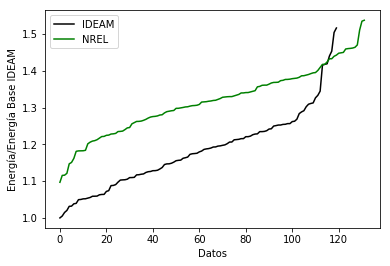

In [9]:
ideam, nrel=darSeries('Valledupar')
datosIdeam=promDiaMen(ideam)
graficarDistribucionDeEnergia(ideam, 'IDEAM','-k',datosIdeam)
graficarDistribucionDeEnergia(nrel, 'NREL','-g',datosIdeam)

Funcion que calcula la enerergia que se obtendra el 99% de las veces a partir de una serie horaria.

Parametros: serie horaria.

Retorna: valor de la ENFICC

In [10]:
def ENFICC(serieHoraria):
    percentil=0.01
    
    ghiMensual=ghi_mensual(serieHoraria)
    ghiDiario=ghi_dia(ghiMensual)
    
    enficc=ghiDiario.quantile(q=percentil, numeric_only=True)['GHIdiario']
    return enficc

Funcion que corta de un dataFrame los meses de un intervalo de años indicado

Parametros: serie, año Inicio, año Fin, mes de inicio, mes de fin

Retorna: serie cortada


In [11]:

def cortar(serie, añoInicio, añoFin, mesesInicio, mesesFin):
        if(añoInicio == añoFin) & (mesesFin >= mesesInicio):
            serie = serie[(serie['AÑO']==añoInicio) & (serie['MES']>=mesesInicio) & (serie['MES']<=mesesFin)]
            
        if(añoInicio != añoFin):
            serie_1 = serie[(serie['AÑO']==añoInicio) & (serie['MES']>=mesesInicio)]
            serie_2= serie[(serie['AÑO']>añoInicio)&(serie['AÑO']<añoFin)]
            serie_3 = serie[(serie['AÑO']==añoFin) & (serie['MES']<=mesesFin)]
            serie = pd.concat([serie_1, serie_2, serie_3])
            
        if(añoFin < añoInicio):
            
            serie = 'El año final no puede ser menor al año inicial'
        return serie




Funcion que calcula la media y la desviacion estandar poblacional a partir de una columna de datos.

Parametros: columna de la serie de datos.

Retorna: media y desviacion estandar poblacional.

In [12]:
def prom_desv(ColumnaSerie):
    return np.mean(ColumnaSerie), np.std(ColumnaSerie)

Funcion que ajusta una serie larga a partir de una serie corta de refencia.

Parametros: serie corta, serie larga

Retorna: serie larga con el ajuste de curva realizado

In [13]:
def mcp(seCorta, seLarga, seLargaCort):
    mu_y, desv_y=prom_desv(seCorta)
    mu_x, desv_x=prom_desv(seLargaCort)
    y=(mu_y-(desv_y/desv_x)*mu_x)+(desv_y/desv_x)*seLarga
    y=y.clip(lower=0)
    return y

Funcion que calcula el enficc de ideam, nrel y la serie corregida a partir de las especificaciones de fecha que se hacen para el ajuste de la serie corregida

-Parametros: ciudad, año inicio, año fin, mes inicio, mes fin

-Retorna:enficc ideam, enficc nrel, enficc serie corregida

In [14]:
def comENFICC(ciudad,añoInicio,añoFin,mesesInicio,mesesFin):
    ideam,nrel=darSeries(ciudad)
    enficcIdema=ENFICC(ideam)
    enficcNrel=ENFICC(nrel)
    ideamCor=cortar(ideam,añoInicio,añoFin,mesesInicio,mesesFin)
    nrelCor=cortar(nrel,añoInicio,añoFin,mesesInicio,mesesFin)
    serie=mcp(ideamCor['IDEAM'],nrel['NREL'],nrelCor['NREL'])
    nuevaSerie=nrel
    nuevaSerie['NREL']=serie
    enficcSerie=ENFICC(nuevaSerie)
    return enficcIdema,enficcNrel,enficcSerie

Funcion que a partir de un nombre de ciudad y un numero de meses grafica la distribucion de energia corregida, del ideam y del nrel.

Parametros: nombre ciudad,añoInicio del corte, año de fin del corte, mdes de inicio del corte y mes de fin del corte.

In [15]:
def graficarPrediccion(ciudad,añoInicioEmpare,añoFinEmpare, añoInicio, añoFin, mesesInicio, mesesFin, nombreSerie,color):
    ideam,nrelD=darSeries(ciudad)
    nrel=cortar(nrelD,añoInicioEmpare,añoFinEmpare,1,12)
    ideamCortada=cortar(ideam,añoInicio,añoFin,mesesInicio,mesesFin)['IDEAM'] 
    cCorregida=mcp(ideamCortada,nrel['NREL'],cortar(nrel,añoInicio,añoFin,mesesInicio,mesesFin)['NREL'])
    datosIdeam=promDiaMen(ideam)
    graficarDistribucionDeEnergia(nrel,'vieja','-r',datosIdeam)
    graficarDistribucionDeEnergia(ideam,'IDEAM','-k',datosIdeam)
    nuevaSerie=nrel
    nuevaSerie['NREL']=cCorregida
    graficarDistribucionDeEnergia(nuevaSerie,nombreSerie,color,datosIdeam)



Funcion que calcula el mean bias(MB) a partir de dos series cortadas

Parametros: serie satelital cortada, serie de tierra cortada

retorna: MB, serie nrel para calcular el mean bias relativo

In [16]:
def MB(serieSat,serieTier):

    N=len(serieSat)
    rest=array(serieSat)-array(serieTier)
    suma=sum(rest)
    return suma/N

Funcion que calcula el mean bias realtivo (rMB) a partir de dos series cortadas

Parametros: serie satelital cortada, serie tierra cortada

retorna: rMB

In [17]:
def rMB(serieSat,serieTier):
    mb=MB(serieSat,serieTier)
    suma=sum(serieTier)
    N=len(serieTier)
    div=suma/N
    r=mb/div
    return r

Funcion que calcula el root mean square deviation (RMSD)

Parametros: ciudad, año, mes de inicio, mes de fin

retorna: RMSD, serie nrel


In [18]:
def RMSD(serieSat,serieTierra):

    N=len(serieSat)
    rest=(array(serieSat)-array(serieTierra))**2
    suma=sum(rest)
    div=suma/N
    sq=div**(.5)
    return sq

Funcion que calcula el root mean square deviation relativo(RMSD)

Parametros: ciudad, año, mes de inicio, mes de fin

retorna: rRMSD

In [19]:
def rRMSD(serieSat,serieTier):
    rmsd=RMSD(serieSat,serieTier)
    suma=sum(serieTier)
    N=len(serieTier)
    div=suma/N
    r=rmsd/div
    return r


Funcion que calcula el KSI en un año y lapso de meses igual para una ciudad

Parametros: ciudad, año, mes inicio, mes de fin

In [20]:
def KSI(serieSat,serieTier):

    return st.ks_2samp(serieSat,serieTier)

Funcion que calcula el rMB de ideam, nrel y la serie corregida a partir de las especificaciones de fecha que se hacen para el ajuste de la serie corregida

-Parametros: ciudad, (año inicio, año fin, mes inicio, mes fin (el lapso de tiempo debe de ser de 10 años)),año  de Inicio de la Correccion,año  de Fin Correccion, meses Icinio Correccion, meses Fin Correccion

-Retorna:rMB nrel-ideam, rMB corregida-ideam

In [21]:
def comRMB(ciudad,añoInicioCor,añoFinCor,mesesIcinioCor,mesesFinCor,añoInicio,añoFin,mesesIcinio,mesesFin):
    ideam,nrel=darSeries(ciudad)
    nrelCor10=cortar(nrel,añoInicio,añoFin,mesesIcinio,mesesFin)
    ideamCor10=cortar(ideam,añoInicio,añoFin,mesesIcinio,mesesFin)
    rmbNrel=rMB(nrelCor10['NREL'],ideamCor10['IDEAM'])
    
    nrelCor=cortar(nrel,añoInicioCor,añoFinCor,mesesIcinioCor,mesesFinCor)
    ideamCor=cortar(ideam,añoInicioCor,añoFinCor,mesesIcinioCor,mesesFinCor)
    
    seCorregida=mcp(ideamCor['IDEAM'],nrel['NREL'],nrelCor['NREL'])
    nuevaSerie=nrel
    nuevaSerie['NREL']=seCorregida
    seCortada=cortar(nuevaSerie,añoInicio,añoFin,mesesIcinio,mesesFin)
    rmbCorregida=rMB(seCortada['NREL'],ideamCor10['IDEAM'])
    return rmbNrel,rmbCorregida

Funcion que calcula el RMSD de ideam, nrel y la serie corregida a partir de las especificaciones de fecha que se hacen para el ajuste de la serie corregida

-Parametros: ciudad, (año inicio, año fin, mes inicio, mes fin (el lapso de tiempo debe de ser de 10 años)),año  de Inicio de la Correccion,año  de Fin Correccion, meses Icinio Correccion, meses Fin Correccion

-Retorna:RMSD nrel-ideam, RMSD corregida-ideam

In [22]:
def comRMSD(ciudad,añoInicioCor,añoFinCor,mesesIcinioCor,mesesFinCor,añoInicio,añoFin,mesesIcinio,mesesFin):
    ideam,nrel=darSeries(ciudad)
    nrelCor10=cortar(nrel,añoInicio,añoFin,mesesIcinio,mesesFin)
    ideamCor10=cortar(ideam,añoInicio,añoFin,mesesIcinio,mesesFin)
    rmsdNrel=RMSD(nrelCor10['NREL'],ideamCor10['IDEAM'])
    
    nrelCor=cortar(nrel,añoInicioCor,añoFinCor,mesesIcinioCor,mesesFinCor)
    ideamCor=cortar(ideam,añoInicioCor,añoFinCor,mesesIcinioCor,mesesFinCor)
    
    seCorregida=mcp(ideamCor['IDEAM'],nrel['NREL'],nrelCor['NREL'])
    nuevaSerie=nrel
    nuevaSerie['NREL']=seCorregida
    seCortada=cortar(nuevaSerie,añoInicio,añoFin,mesesIcinio,mesesFin)
    rmsdCorregida=RMSD(seCortada['NREL'],ideamCor10['IDEAM'])
    return rmsdNrel,rmsdCorregida

Funcion que calcula el rRMSD de ideam, nrel y la serie corregida a partir de las especificaciones de fecha que se hacen para el ajuste de la serie corregida

-Parametros: ciudad, (año inicio, año fin, mes inicio, mes fin (el lapso de tiempo debe de ser de 10 años)),año  de Inicio de la Correccion,año  de Fin Correccion, meses Icinio Correccion, meses Fin Correccion

-Retorna:rRMSD nrel-ideam, rRMSD corregida-ideam

In [23]:
def comrRMSD(ciudad,añoInicioCor,añoFinCor,mesesIcinioCor,mesesFinCor,añoInicio,añoFin,mesesIcinio,mesesFin):
    ideam,nrel=darSeries(ciudad)
    nrelCor10=cortar(nrel,añoInicio,añoFin,mesesIcinio,mesesFin)
    ideamCor10=cortar(ideam,añoInicio,añoFin,mesesIcinio,mesesFin)
    rrmsdNrel=rRMSD(nrelCor10['NREL'],ideamCor10['IDEAM'])
    
    nrelCor=cortar(nrel,añoInicioCor,añoFinCor,mesesIcinioCor,mesesFinCor)
    ideamCor=cortar(ideam,añoInicioCor,añoFinCor,mesesIcinioCor,mesesFinCor)
    
    seCorregida=mcp(ideamCor['IDEAM'],nrel['NREL'],nrelCor['NREL'])
    nuevaSerie=nrel
    nuevaSerie['NREL']=seCorregida
    seCortada=cortar(nuevaSerie,añoInicio,añoFin,mesesIcinio,mesesFin)
    rrmsdCorregida=rRMSD(seCortada['NREL'],ideamCor10['IDEAM'])
    return rrmsdNrel,rrmsdCorregida
    
    

In [24]:
comrRMSD('Cali',2010,2011,3,4,2007,2014,1,12)

(0.75008525062939313, 0.63055411702004915)

Ahora ya planteadas las funciones que se van a usar se procede a realizar el analisis por cada ciudad

Para el caso de Barranquilla se cuenta tanto con informacion satelital y en tierra de 6 años (2010-2015):
Como dice la norma es necesario poseer informacion de minimo 3 meses en tierra para realizar la prediccion de la produccion de energia, por esta razon se tomaron 30 muestras de 3 meses en el lapso de tiempo del que poseemos informacion para ver el efecto que puede traer en la prediccion.


In [25]:
a=[2010,2011,2012,2013,2014,2015]
b=[1,3,5,7,9]

B='Barranquilla'
IniB=2010
FinB=2015

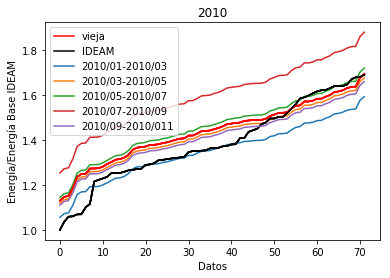

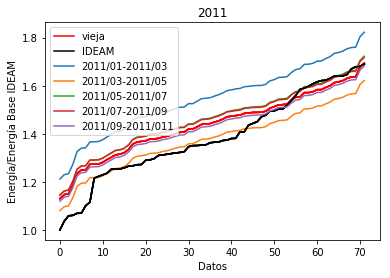

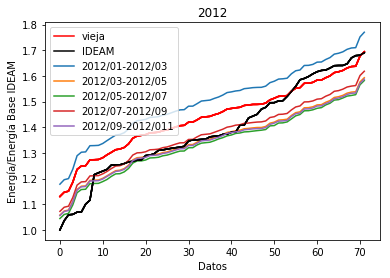

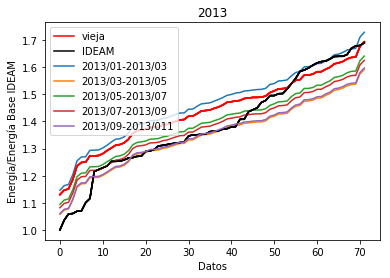

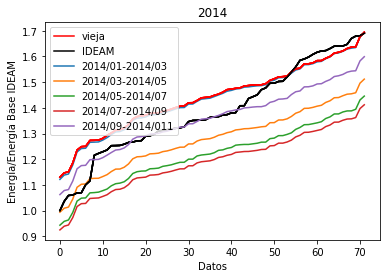

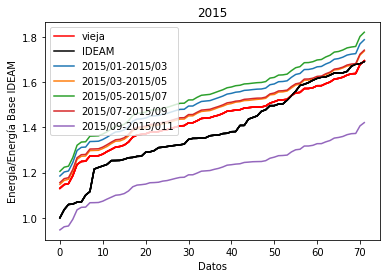

In [26]:

for aqno in a:
    figure(aqno-2009)
    v=[0,1,2,3,4]
    for i in v:   
        graficarPrediccion(B,IniB,FinB,aqno,aqno,1+i*2,3+i*2,str(aqno)+'/0'+str(i*2+1)+'-'+str(aqno)+'/0'+str(3+i*2),'C'+str(i))
        plt.title(str(aqno))


En las graficas anteriores podemos notar que para el caso de barranquilla el metodo de correcion MCP dependiendo del momento del año en el que se tomen los 3 meses de muetras la serie corregida es muy diferente. Tambien se puede notar que en los años 2014 y 2015 es donde mas ocurre esta variacion con respeto al metodo MCP.

En Barranquilla para la serie IDEAM se obtuvo un valor de ENFICC=4.16059025817 y para la serie NREL se obtuvo un valor de ENFICC=4.60594683333


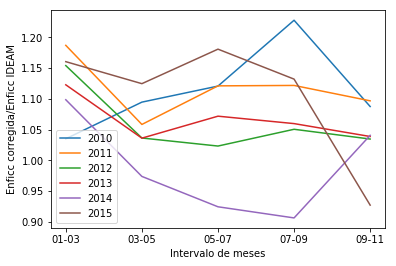

In [27]:
ideam,nrel,cor=comENFICC(B,2010,2010,1,3)

m=['01-03','03-05','05-07','07-09','09-11']
print('En '+B+' para la serie IDEAM se obtuvo un valor de ENFICC='+str(ideam)+' y para la serie NREL se obtuvo un valor de ENFICC='+str(nrel))
for aqno in a:
    v=[0,1,2,3,4]
    for i in v:
        ideam,nrel,cor=comENFICC(B,aqno,aqno,1+2*i,3+2*i)
        v[i]=cor/ideam
    pylab.plot(m,v,'C'+str(aqno-2010), label=str(aqno))
    pylab.xlabel("Intervalo de meses")
    pylab.ylabel("Enficc corregida/Enficc IDEAM")
pylab.legend(loc='lower left')    
    

Con esta grafica se puede reafirmar que el metodo MCP no es muy bueno para estimar la energia que se puede producir el 1% de las veces, ya que como podemos ver segun la muestra que tomemos esta puede variar entre el 10% menor y 20% mayor a la enficc reportada a partir de los datos ideam.

En Barranquilla entre la serie IDEAM y la serie NREL existe un rMB=0.0795319066106


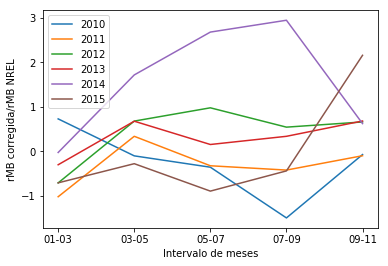

In [29]:

rMBnrel,rMb=comRMB(B,2010,2015,1,12,2010,2010,1,3)
print('En '+B+' entre la serie IDEAM y la serie NREL existe un rMB='+str(rMBnrel))
for aqno in a:
    v=[0,1,2,3,4]
    for i in v:
        x,rMBcor=comRMB(B,a[0],a[-1],1,12,aqno,aqno,1+2*i,3+2*i)
        v[i]=rMBcor/rMBnrel
    pylab.plot(m,v,'C'+str(aqno-2010), label=str(aqno))
    pylab.xlabel("Intervalo de meses")
    pylab.ylabel("rMB corregida/rMB NREL")
pylab.legend(loc='upper left')


En Barranquilla entre la serie IDEAM y la serie NREL existe un rRMSD=0.624065776552


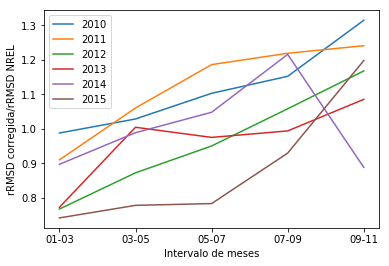

In [30]:

rRMSDnrel,rMb=comrRMSD(B,2010,2015,1,12,2010,2010,1,3)
print('En '+B+' entre la serie IDEAM y la serie NREL existe un rRMSD='+str(rRMSDnrel))
for aqno in a:
    v=[0,1,2,3,4]
    for i in v:
        x,rRMSDcor=comrRMSD(B,a[0],a[-1],1,12,aqno,aqno,1+2*i,3+2*i)
        v[i]=rRMSDcor/rRMSDnrel
    pylab.plot(m,v,'C'+str(aqno-2010), label=str(aqno))
    pylab.xlabel("Intervalo de meses")
    pylab.ylabel("rRMSD corregida/rRMSD NREL")
pylab.legend(loc='upper left')

Para el caso de Medelliin se cuenta tanto con informacion satelital y en tierra de 10 años (2006-2015): Como dice la norma es necesario poseer informacion de minimo 3 meses en tierra para realizar la prediccion de la produccion de energia, por esta razon se tomaron 30 muestras de 3 meses en el lapso de tiempo del que poseemos informacion para ver el efecto que puede traer en la prediccion

In [31]:
a=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
m=['03-05','05-07','07-09']
M='Medellin'
IniM=a[0]
FinM=a[-1]

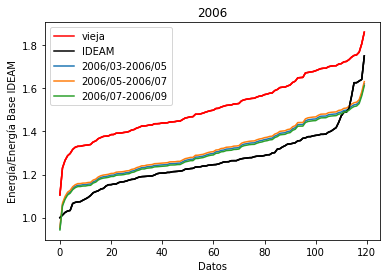

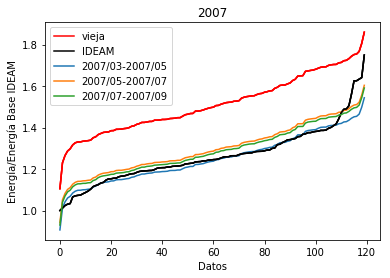

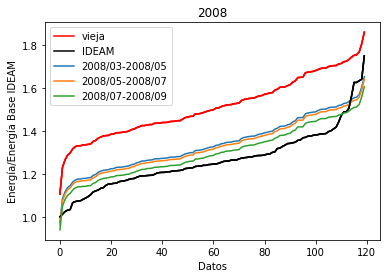

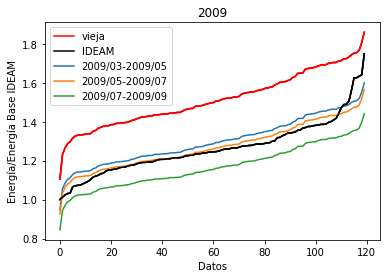

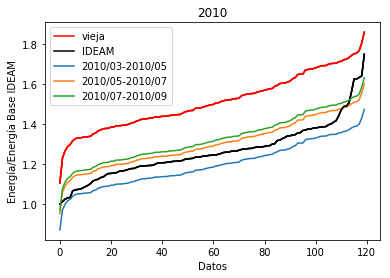

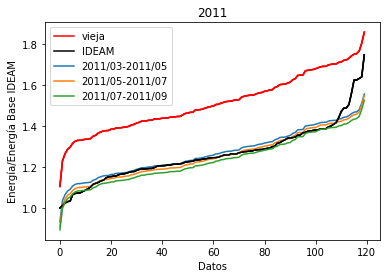

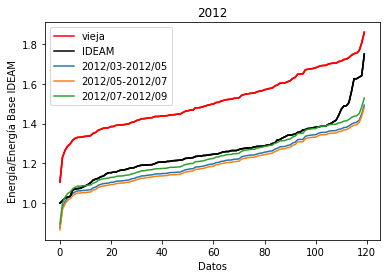

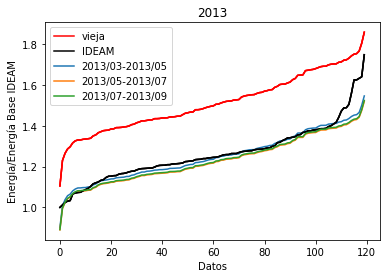

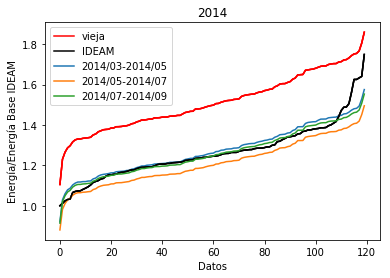

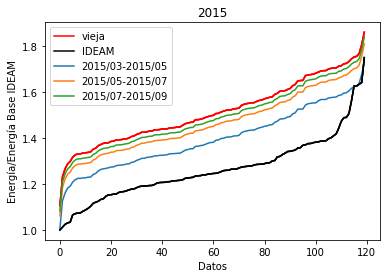

In [32]:
for aqno in a:
    figure(aqno-2005)
    v=[0,1,2]
    for i in v:   
        graficarPrediccion(M,IniM,FinM,aqno,aqno,3+i*2,5+i*2,str(aqno)+'/0'+str(i*2+3)+'-'+str(aqno)+'/0'+str(5+i*2),'C'+str(i))
        plt.title(str(aqno))


En Medellin para la serie IDEAM se obtuvo un valor de ENFICC=3.53519358791 y para la serie NREL se obtuvo un valor de ENFICC=4.32600282796


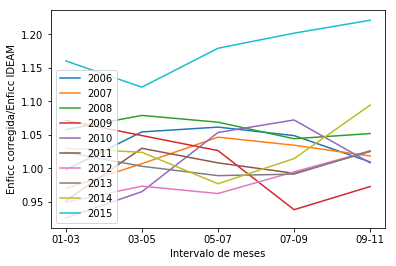

In [33]:
ideam,nrel,cor=comENFICC(M,a[0],a[0],1,3)

m=['01-03','03-05','05-07','07-09','09-11']
print('En '+M+' para la serie IDEAM se obtuvo un valor de ENFICC='+str(ideam)+' y para la serie NREL se obtuvo un valor de ENFICC='+str(nrel))
for aqno in a:
    v=[0,1,2,3,4]
    for i in v:
        ideam,nrel,cor=comENFICC(M,aqno,aqno,1+2*i,3+2*i)
        v[i]=cor/ideam
    pylab.plot(m,v,'C'+str(aqno-a[0]), label=str(aqno))
    pylab.xlabel("Intervalo de meses")
    pylab.ylabel("Enficc corregida/Enficc IDEAM")
pylab.legend(loc='lower left')    

En Medellin entre la serie IDEAM y la serie NREL existe un rMB=0.24921477313


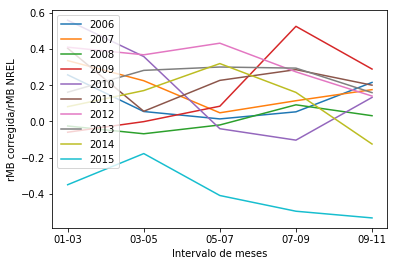

In [34]:
rMBnrel,rMb=comRMB(M,a[0],a[-1],1,12,a[0],a[0],1,3)
print('En '+M+' entre la serie IDEAM y la serie NREL existe un rMB='+str(rMBnrel))
for aqno in a:
    v=[0,1,2,3,4]
    for i in v:
        x,rMBcor=comRMB(M,a[0],a[-1],1,12,aqno,aqno,1+2*i,3+2*i)
        v[i]=rMBcor/rMBnrel
    pylab.plot(m,v,'C'+str(aqno-2006), label=str(aqno))
    pylab.xlabel("Intervalo de meses")
    pylab.ylabel("rMB corregida/rMB NREL")
pylab.legend(loc='upper left')

En Medellin entre la serie IDEAM y la serie NREL existe un rRMSD=0.769559311402


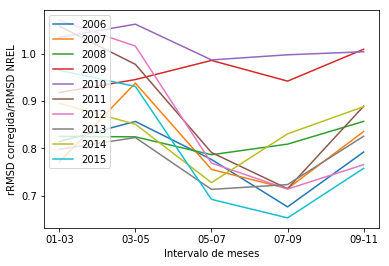

In [35]:

rRMSDnrel,rMb=comrRMSD(M,a[0],a[-1],1,12,a[0],a[0],1,3)
print('En '+M+' entre la serie IDEAM y la serie NREL existe un rRMSD='+str(rRMSDnrel))
for aqno in a:
    v=[0,1,2,3,4]
    for i in v:
        x,rRMSDcor=comrRMSD(M,a[0],a[-1],1,12,aqno,aqno,1+2*i,3+2*i)
        v[i]=rRMSDcor/rRMSDnrel
    pylab.plot(m,v,'C'+str(aqno-a[0]), label=str(aqno))
    pylab.xlabel("Intervalo de meses")
    pylab.ylabel("rRMSD corregida/rRMSD NREL")
pylab.legend(loc='upper left')

Para el caso de Sucre se cuenta tanto con informacion satelital y en tierra de 10 años (2006-2015): Como dice la norma es necesario poseer informacion de minimo 3 meses en tierra para realizar la prediccion de la produccion de energia, por esta razon se tomaron 30 muestras de 3 meses en el lapso de tiempo del que poseemos informacion para ver el efecto que puede traer en la prediccion.

In [ ]:
a=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
m=['03-05','05-07','07-09']
S='Sucre'
IniS=a[0]
FinS=a[-1]

In [ ]:
for aqno in a:
    figure(aqno-2005)
    v=[0,1,2]
    for i in v:   
        graficarPrediccion(S,IniS,FinS,aqno,aqno,3+i*2,5+i*2,str(aqno)+'/0'+str(i*2+3)+'-'+str(aqno)+'/0'+str(5+i*2),'C'+str(i))
        plt.title(str(aqno))


In [ ]:
ideam,nrel,cor=comENFICC(S,a[0],a[0],1,3)

m=['01-03','03-05','05-07','07-09','09-11']
print('En '+S+' para la serie IDEAM se obtuvo un valor de ENFICC='+str(ideam)+' y para la serie NREL se obtuvo un valor de ENFICC='+str(nrel))
for aqno in a:
    v=[0,1,2,3,4]
    for i in v:
        ideam,nrel,cor=comENFICC(S,aqno,aqno,1+2*i,3+2*i)
        v[i]=cor/ideam
    pylab.plot(m,v,'C'+str(aqno-a[0]), label=str(aqno))
    pylab.xlabel("Intervalo de meses")
    pylab.ylabel("Enficc corregida/Enficc IDEAM")
pylab.legend(loc='lower left') 

In [ ]:
rMBnrel,rMb=comRMB(M,a[0],a[-1],1,12,a[0],a[0],1,3)
print('En '+S+' entre la serie IDEAM y la serie NREL existe un rMB='+str(rMBnrel))
for aqno in a:
    v=[0,1,2,3,4]
    for i in v:
        x,rMBcor=comRMB(S,a[0],a[-1],1,12,aqno,aqno,1+2*i,3+2*i)
        v[i]=rMBcor/rMBnrel
    pylab.plot(m,v,'C'+str(aqno-a[0]), label=str(aqno))
    pylab.xlabel("Intervalo de meses")
    pylab.ylabel("rMB corregida/rMB NREL")
pylab.legend(loc='upper left')

In [ ]:

rRMSDnrel,rMb=comrRMSD(M,a[0],a[-1],1,12,a[0],a[0],1,3)
print('En '+S+' entre la serie IDEAM y la serie NREL existe un rRMSD='+str(rRMSDnrel))
for aqno in a:
    v=[0,1,2,3,4]
    for i in v:
        x,rRMSDcor=comrRMSD(S,a[0],a[-1],1,12,aqno,aqno,1+2*i,3+2*i)
        v[i]=rRMSDcor/rRMSDnrel
    pylab.plot(m,v,'C'+str(aqno-a[0]), label=str(aqno))
    pylab.xlabel("Intervalo de meses")
    pylab.ylabel("rRMSD corregida/rRMSD NREL")
pylab.legend(loc='upper left')

Para el caso de Valledupar se cuenta tanto con informacion satelital y en tierra de 10 años (2006-2015): Como dice la norma es necesario poseer informacion de minimo 3 meses en tierra para realizar la prediccion de la produccion de energia, por esta razon se tomaron 30 muestras de 3 meses en el lapso de tiempo del que poseemos informacion para ver el efecto que puede traer en la prediccion.

In [ ]:
a=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
m=['03-05','05-07','07-09']
V='Valledupar'
IniV=a[0]
FinV=a[-1]

In [ ]:
for aqno in a:
    figure(aqno-2005)
    v=[0,1,2]
    for i in v:   
        graficarPrediccion(V,IniV,FinV,aqno,aqno,3+i*2,5+i*2,str(aqno)+'/0'+str(i*2+3)+'-'+str(aqno)+'/0'+str(5+i*2),'C'+str(i))
        plt.title(str(aqno))


In [ ]:
ideam,nrel,cor=comENFICC(S,a[0],a[0],1,3)

m=['01-03','03-05','05-07','07-09','09-11']
print('En '+M+' para la serie IDEAM se obtuvo un valor de ENFICC='+str(ideam)+' y para la serie NREL se obtuvo un valor de ENFICC='+str(nrel))
for aqno in a:
    v=[0,1,2,3,4]
    for i in v:
        ideam,nrel,cor=comENFICC(M,aqno,aqno,1+2*i,3+2*i)
        v[i]=cor/ideam
    pylab.plot(m,v,'C'+str(aqno-a[0]), label=str(aqno))
    pylab.xlabel("Intervalo de meses")
    pylab.ylabel("Enficc corregida/Enficc IDEAM")
pylab.legend(loc='lower left') 

In [ ]:
rMBnrel,rMb=comRMB(M,a[0],a[-1],1,12,a[0],a[0],1,3)
print('En '+V+' entre la serie IDEAM y la serie NREL existe un rMB='+str(rMBnrel))
for aqno in a:
    v=[0,1,2,3,4]
    for i in v:
        x,rMBcor=comRMB(V,a[0],a[-1],1,12,aqno,aqno,1+2*i,3+*i)
        v[i]=rMBcor/rMBnrel
    pylab.plot(m,v,'C'+str(aqno-a[0]), label=str(aqno))
    pylab.xlabel("Intervalo de meses")
    pylab.ylabel("rMB corregida/rMB NREL")
pylab.legend(loc='upper left')

In [ ]:
rRMSDnrel,rMb=comrRMSD(V,a[0],a[-1],1,12,a[0],a[0],1,3)
print('En '+S+' entre la serie IDEAM y la serie NREL existe un rRMSD='+str(rRMSDnrel))
for aqno in a:
    v=[0,1,2,3,4]
    for i in v:
        x,rRMSDcor=comrRMSD(V,a[0],a[-1],1,12,aqno,aqno,1+2*i,3+2*i)
        v[i]=rRMSDcor/rRMSDnrel
    pylab.plot(m,v,'C'+str(aqno-a[0]), label=str(aqno))
    pylab.xlabel("Intervalo de meses")
    pylab.ylabel("rRMSD corregida/rRMSD NREL")
pylab.legend(loc='upper left')